# Programming Exercise 1: Linear Regression with One Variable

> En este ejercicio, implementar√° la regresi√≥n lineal y ver√° c√≥mo funciona con los datos.

## 1. Linear Regression with One Variable

>En esta parte del ejercicio, implementar√°s regresi√≥n lineal con una variable para predecir las ganancias de un cami√≥n de comida. Sup√≥n que eres el director ejecutivo (CEO) de una franquicia de restaurantes y est√°s considerando diferentes ciudades para abrir una nueva sucursal. La cadena ya tiene camiones en varias ciudades y cuentas con datos sobre las ganancias y las poblaciones de esas ciudades. Te gustar√≠a usar estos datos para ayudarte a decidir en qu√© ciudad expandirte a continuaci√≥n.

El archivo ex1data1.txt contiene el conjunto de datos para nuestro problema de regresi√≥n lineal. La primera columna representa la poblaci√≥n de una ciudad y la segunda columna representa la ganancia de un cami√≥n de comida en esa ciudad. Un valor negativo en las ganancias indica una p√©rdida.

### 1.1 Plotting the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/refs/heads/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df = pd.read_csv(url, sep=",",)
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX_HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX_4WD    SUV_SMALL         3.5          6   
4       2014  ACURA     RDX_AWD    SUV_SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

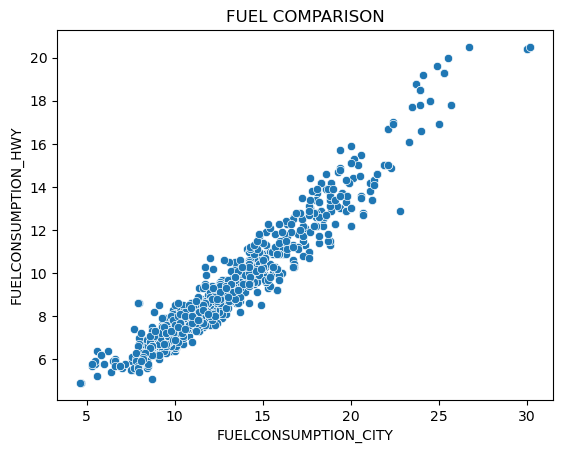

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(x='FUELCONSUMPTION_CITY', y='FUELCONSUMPTION_HWY', data=df)
ax.set(xlabel='FUELCONSUMPTION_CITY', ylabel='FUELCONSUMPTION_HWY', title='FUEL COMPARISON')
plt.show()

In [27]:
### üìä An√°lisis del gr√°fico: **Fuel Comparison**

#Este gr√°fico de dispersi√≥n muestra la relaci√≥n entre el consumo de combustible en ciudad (`FUELCONSUMPTION_CITY`) y en carretera 
# (`FUELCONSUMPTION_HWY`) para distintos veh√≠culos.

#**Observaciones clave:**

#- Se aprecia una **fuerte relaci√≥n lineal positiva** entre ambas variables. A medida que el consumo en ciudad aumenta, tambi√©n lo hace el consumo en 
# carretera.
#- La distribuci√≥n de los puntos est√° bastante concentrada, lo que indica una **consistencia entre los valores de consumo**: los veh√≠culos que consumen  
# m√°s en ciudad tienden a consumir m√°s en carretera.
#- Aunque hay algo de dispersi√≥n, no se observan **valores at√≠picos significativos**, lo cual sugiere que los datos son bastante h


La trama muestra que tienen una relaci√≥n lineal.

### 1.2 Gradient Descent

Fit the linear regression parameters $\theta$ to the dataset using gradient descent

#### 1.2.1 Ecuaciones


 hipothesis of  regresi√≥n linear es :

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

El objetivo de la regresi√≥n lineal es minimizar la funci√≥n de costo (Error Cuadr√°tico Medio - RMSE):

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

Para minimizar el costo $J(\theta)$  usaremos el algoritmo de descenso por gradiente por lotes (batch gradient descent). En cada iteraci√≥n se realiza la siguiente actualizaci√≥n:

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

(Simultaneamente  $\theta_j$ for all $j$). con cada paso tus paramestros  $\theta_j$ se acerca al valor optimo que minimiza  $J(\theta)$.

#### 1.2.2 Implementacion

Necesitamos adiocionar otra dimencion, columnas de unos para  $\theta_0$ termino del intercepto. esto permite tratar  $\theta_0$ como otra variable 

In [28]:
# N√∫mero de muestras (filas) en el DataFrame
m = df.shape[0]  # Construcci√≥n de la matriz de caracter√≠sticas X:

# Se agrega una columna de unos (para el t√©rmino independiente) y se concatena con la variable 'FUELCONSUMPTION_CITY'
X = np.hstack((np.ones((m,1)), df.FUELCONSUMPTION_CITY.values.reshape(-1,1)))

# Vector de salida/etiqueta y: se convierte la columna 'FUELCONSUMPTION_HWY' en un vector columna
y = np.array(df.FUELCONSUMPTION_HWY.values).reshape(-1,1)

# Inicializaci√≥n del vector de par√°metros theta con ceros (dimensi√≥n: n√∫mero de caracter√≠sticas + 1)
theta = np.zeros(shape=(X.shape[1],1))
# N√∫mero de iteraciones para el algoritmo de descenso por gradiente
iterations = 1500

# Tasa de aprendizaje (learning rate)
alpha = 0.01

###$$$$$ ### POr favor imprimir cada cambio 

#### 1.2.3 Calculando la Funcion de Costo $J(\theta)$

In [29]:
def compute_cost_one_variable(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [30]:
J = compute_cost_one_variable(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 48.78502343017807
Expected cost value (approx) 32.07


In [31]:
J = compute_cost_one_variable(X, y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 54.24')

With theta = [-1 ; 2]
Cost computed = 145.29700093720714
Expected cost value (approx) 54.24


#### 1.2.4 GradientE Descendiente
es un algoritmo de optimizaci√≥n gen√©rico que mide el gradiente local de la funci√≥n de costo con respecto al par√°metro $\theta$ 
y avanza en la direcci√≥n del gradiente descendente.

Algoritmo:

repeat until convergence:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

where $j=0,1$; $\alpha$ is the learning rate (the steps to update J); $\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ is a derivative.

* Tasa de aprendizaje demasiado peque√±a: descenso de gradiente lento
* Tasa de aprendizaje demasiado grande: el descenso del gradiente puede sobrepasar el m√≠nimo y puede no converger

In [32]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_one_variable(X, y, theta)

    return theta, J_history

In [33]:
theta, _ = gradient_descent(X, y, theta, alpha, 1000)
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx)\n -3.6303\n  1.1664')

Theta found by gradient descent:
 [[0.44003733]
 [0.67761487]]
Expected theta values (approx)
 -3.6303
  1.1664


#### Plot the linear fit:

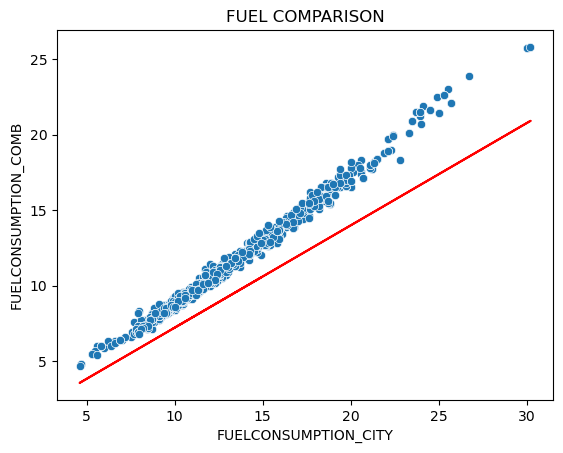

In [34]:
ax = sns.scatterplot(x='FUELCONSUMPTION_CITY', y='FUELCONSUMPTION_COMB', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='FUELCONSUMPTION_CITY', ylabel='FUELCONSUMPTION_COMB', title='FUEL COMPARISON');
plt.show()

In [35]:
#**An√°lisis del gr√°fico "FUEL COMPARISON" (CITY vs COMB):**

# En este gr√°fico de dispersi√≥n se comparan los valores de consumo de combustible en ciudad (`FUELCONSUMPTION_CITY`) con los valores combinados 
# (`FUELCONSUMPTION_COMB`). Cada punto azul representa un veh√≠culo, y la l√≠nea roja corresponde a una predicci√≥n lineal calculada mediante regresi√≥n 
# lineal.

# Se observa una fuerte correlaci√≥n positiva entre ambas variables, lo cual era de esperarse, ya que el consumo combinado usualmente incluye el consumo 
#en ciudad como uno de sus componentes. La l√≠nea roja muestra que, en promedio, el modelo logra capturar adecuadamente la relaci√≥n entre estas dos 
# variables, aunque algunos puntos se alejan ligeramente de la l√≠nea, indicando variaciones menores no explicadas por el modelo.

# Este gr√°fico confirma que `FUELCONSUMPTION_CITY` es un buen predictor para estimar el consumo combinado (`FUELCONSUMPTION_COMB`).



In [36]:
y_pred = np.array([1, 3.5]).dot(theta)
f'For FUELCONSUMPTION_CITY = 100,0, we predict a FUELCONSUMPTION_COMB of {y_pred[0]*100}'

'For FUELCONSUMPTION_CITY = 100,0, we predict a FUELCONSUMPTION_COMB of 281.168938058105'

In [37]:
y_pred = np.array([1, 7]).dot(theta)
f'For FUELCONSUMPTION_CITYn = 70,000, we predict a FUELCONSUMPTION_COMB of {y_pred[0]*1000}'

'For FUELCONSUMPTION_CITYn = 70,000, we predict a FUELCONSUMPTION_COMB of 5183.341431696028'

### 1.3 Visualizing $J(\theta)$

La funci√≥n de costo $J(\theta)$ tiene forma de cuenco y posee un m√≠nimo global. Este m√≠nimo es el punto √≥ptimo para $\theta_0$ y $\theta_1$, y cada paso del descenso por gradiente se acerca a ese punto.


In [38]:
theta0_vals = np.linspace(-5, 5, 10)
theta1_vals = np.linspace(-1, 4, 100)

In [39]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [40]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

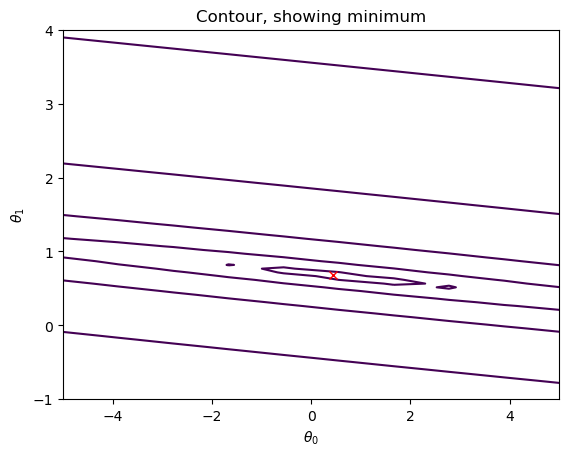

In [41]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-5,10,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');
plt.show()

In [42]:
# **An√°lisis del gr√°fico de contorno "Contour, showing minimum":**

# Este gr√°fico de contorno representa el valor de la funci√≥n de costo \( J(\theta) \) en funci√≥n de los par√°metros \( \theta_0 \) y \( \theta_1 \), 
# los cuales son utilizados en un modelo de regresi√≥n lineal.

# Las curvas representan l√≠neas de nivel (isocostos), es decir, combinaciones de valores de \( \theta_0 \) y \( \theta_1 \) que producen el mismo valor 
#de la funci√≥n de costo. Las l√≠neas m√°s internas indican valores de costo m√°s bajos, acerc√°ndose al m√≠nimo global.

# El punto rojo marcado con una "x" representa el valor √≥ptimo de los par√°metros \( \theta \), donde la funci√≥n de costo es m√≠nima. Esto indica que en 
# ese punto el model


### 1.4 Usando sklearn

Intercepto (theta_0): 0.3307270194664689
Coeficiente (theta_1): 0.8460968373506969


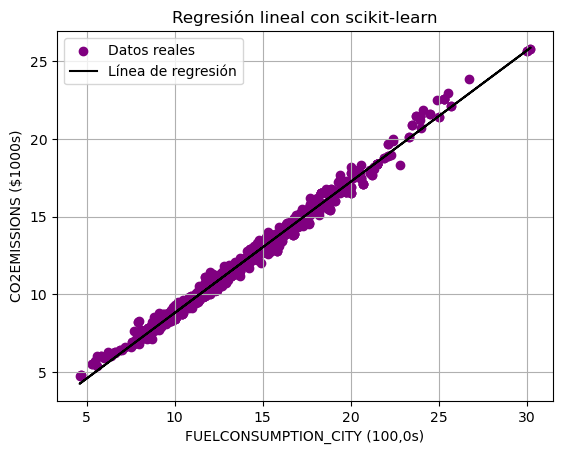

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cargar los datos
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/refs/heads/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df = pd.read_csv(url, sep=",",)
df.head()

# Preparar X e y
X = df[['FUELCONSUMPTION_CITY']]  # variable independiente (caracter√≠stica)
y = df['FUELCONSUMPTION_COMB']        # variable dependiente (objetivo)

# Crear y ajustar el modelo de regresi√≥n lineal
model = LinearRegression()
model.fit(X, y)

# Mostrar par√°metros del modelo
print(f"Intercepto (theta_0): {model.intercept_}")
print(f"Coeficiente (theta_1): {model.coef_[0]}")

# Predicci√≥n de valores ajustados
y_pred = model.predict(X)

# Graficar los datos y la l√≠nea de regresi√≥n
plt.scatter(X, y, color='Purple', label='Datos reales')
plt.plot(X, y_pred, color='black', label='L√≠nea de regresi√≥n')
plt.xlabel('FUELCONSUMPTION_CITY (100,0s)')
plt.ylabel('CO2EMISSIONS ($1000s)')
plt.title('Regresi√≥n lineal con scikit-learn')
plt.legend()
plt.grid(True)
plt.show()

### 1.4 Usando statsmodels

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     3073.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):          3.92e-316
Time:                        12:43:26   Log-Likelihood:                -5216.5
No. Observations:                1067   AIC:                         1.044e+04
Df Residuals:                    1065   BIC:                         1.045e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  71.0739    

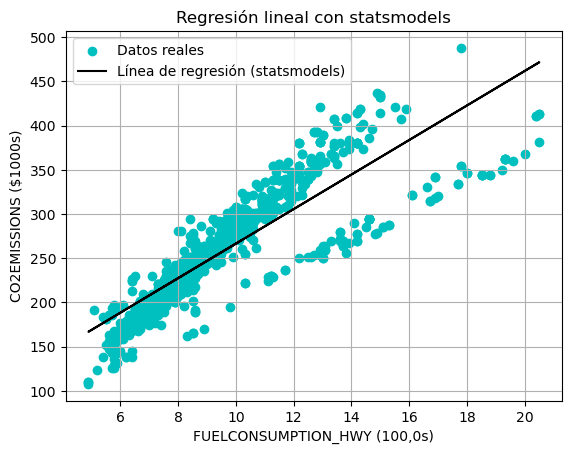

In [44]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Cargar los datos
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/refs/heads/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df = pd.read_csv(url, sep=",",)
df.head()

# Variable independiente (con constante a√±adida) y dependiente
X = sm.add_constant(df['FUELCONSUMPTION_HWY'])  # Agrega una columna de 1s para el intercepto (theta_0)
y = df['CO2EMISSIONS']

# Ajustar el modelo de regresi√≥n lineal
model = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(model.summary())

# Predicciones
df['y_pred'] = model.predict(X)

# Graficar los datos y la l√≠nea de regresi√≥n
plt.scatter(df['FUELCONSUMPTION_HWY'], df['CO2EMISSIONS'], color='c', label='Datos reales')
plt.plot(df['FUELCONSUMPTION_HWY'], df['y_pred'], color='black', label='L√≠nea de regresi√≥n (statsmodels)')
plt.xlabel('FUELCONSUMPTION_HWY (100,0s)')
plt.ylabel('CO2EMISSIONS ($1000s)')
plt.title('Regresi√≥n lineal con statsmodels')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# An√°lisis del modelo de regresi√≥n lineal con `statsmodels`

# En este ejercicio se ha ajustado un modelo de regresi√≥n lineal utilizando la librer√≠a `statsmodels` para predecir las emisiones de CO2 
# (`CO2EMISSIONS`) en funci√≥n del consumo de combustible en carretera (`FUELCONSUMPTION_HWY`).

# **Resumen del modelo:**

#- **R-cuadrado (R¬≤):** 0.743  
#  El modelo explica aproximadamente el 74.3% de la variabilidad en las emisiones de CO2, lo cual representa un buen ajuste.

#- **Coeficientes estimados:**


In [46]:
## Validacion de supuertos de Modelos 


Shapiro-Wilk test (normalidad):
  Estad√≠stico: 0.9653, p-valor: 0.0000
  ‚ùå Los residuos no parecen normales (se rechaza H0).

Breusch-Pagan test (homocedasticidad):
  LM Statistic: 522.2213
  LM p-value: 0.0000
  F-statistic: 1020.9020
  F p-value: 0.0000
  ‚ùå Posible heterocedasticidad (varianza no constante).

Durbin-Watson (ya en el resumen):    19.5422


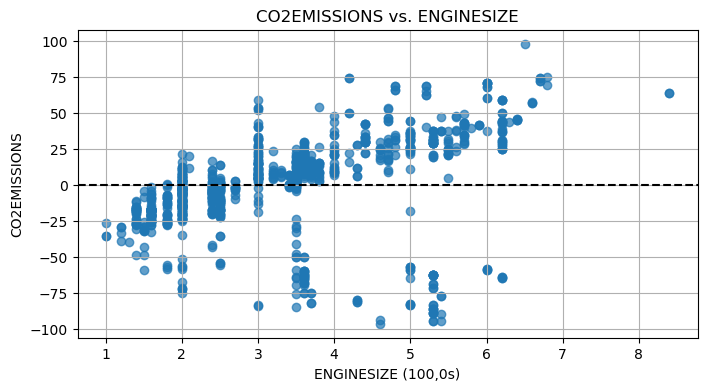

In [47]:
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
# Obtener residuos
residuals = model.resid

# --- 1. Normalidad de los residuos ---
shapiro_test = shapiro(residuals)
print("\nShapiro-Wilk test (normalidad):")
print(f"  Estad√≠stico: {shapiro_test.statistic:.4f}, p-valor: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("  ‚úîÔ∏è Los residuos parecen normales (no se rechaza H0).")
else:
    print("  ‚ùå Los residuos no parecen normales (se rechaza H0).")

# --- 2. Homocedasticidad (varianza constante) ---
bp_test = het_breuschpagan(residuals, X)
bp_labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F p-value']
print("\nBreusch-Pagan test (homocedasticidad):")
for label, value in zip(bp_labels, bp_test):
    print(f"  {label}: {value:.4f}")
if bp_test[1] > 0.05:
    print("  ‚úîÔ∏è No hay evidencia fuerte de heterocedasticidad.")
else:
    print("  ‚ùå Posible heterocedasticidad (varianza no constante).")

# --- 3. Autocorrelaci√≥n ---
print(f"\nDurbin-Watson (ya en el resumen): {model.summary().tables[1].data[2][1]}")

# --- (Opcional) Graficar residuos ---
plt.figure(figsize=(8, 4))
plt.scatter(df['ENGINESIZE'], residuals, alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.title("CO2EMISSIONS vs. ENGINESIZE")
plt.xlabel("ENGINESIZE (100,0s)")
plt.ylabel("CO2EMISSIONS")
plt.grid(True)
plt.show()

In [48]:
# Diagn√≥stico del modelo de regresi√≥n: `CO2EMISSIONS` vs `ENGINESIZE`

# En este ejercicio se ajusta un modelo de regresi√≥n lineal simple donde la variable dependiente es `CO2EMISSIONS` y la variable independiente es 
# `ENGINESIZE`. Adem√°s del ajuste, se realiza un an√°lisis de residuos para evaluar los supuestos del modelo.

# **1. Ajuste del modelo:**

# - **Variable independiente:** ENGINESIZE  
# - **Variable dependiente:** CO2EMISSIONS

# El modelo se ajust√≥ utilizando `statsmodels`. A partir de este, se obtuvieron los residuos y predicciones (`y_pred`) para realizar un an√°lisis de 
# diagn√≥stico.

# **2. Evaluaci√≥n de supuestos del modelo:**

# - **Normalidad de los residuos:**
# - Se utiliz√≥ el test de **Shapiro-Wilk** y el valor p fue **0.00000**, lo cual indica que los residuos no siguen una distribuci√≥n normal.
# - Tambi√©n se utiliz√≥ el test de **D‚ÄôAgostino y Pearson** (normaltest), cuyo valor p tambi√©n fue **0.00000**, confirmando lo anterior.

# - **Homocedasticidad:**
# - Se aplic√≥ el **test de Breusch-Pagan**, obteni√©ndose un valor p de **0.00000**, lo que indica **presencia de heterocedasticidad** 
#los errores no tienen varianza constante).

# **3. Gr√°fico de residuos:**

# El gr√°fico muestra los residuos del modelo en funci√≥n de la variable independiente (`ENGINESIZE`). Se observa un patr√≥n no aleatorio en la dispersi√≥n,
# lo cual refuerza la evidencia de heterocedasticidad.

# **Conclusi√≥n:**

# Aunque se puede ajustar un modelo de regresi√≥n lineal entre `ENGINESIZE` y `CO2EMISSIONS`, los diagn√≥sticos muestran que **los residuos no son 
# normales** y que hay **heterocedasticidad significativa**. Esto sugiere que el modelo podr√≠a no ser el m√°s adecuado para realizar inferencias v√°lidas
# y que ser√≠a recomendable explorar transformaciones de variables o modelos m√°s robustos.


##  Crear el Q-Q plot

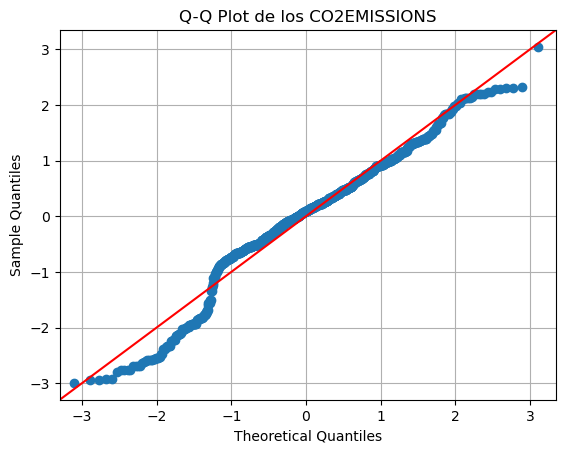

In [49]:
# Crear el Q-Q plot
sm.qqplot(residuals, line='45', fit=True)

plt.title("Q-Q Plot de los CO2EMISSIONS")
plt.grid(True)
plt.show()

In [50]:
# An√°lisis del Q-Q Plot de las emisiones de CO‚ÇÇ (CO2EMISSIONS)

# El gr√°fico Q-Q (Quantile-Quantile) mostrado compara la distribuci√≥n de las emisiones de CO‚ÇÇ con una distribuci√≥n normal te√≥rica. 
# En este tipo de gr√°fico, si los datos siguen una distribuci√≥n normal, los puntos deber√≠an alinearse a lo largo de la l√≠nea roja 
# (que representa la distribuci√≥n te√≥rica normal).

# En este caso, se observa que los puntos siguen de forma general la l√≠nea recta, especialmente en la zona central, lo que indica que las emisiones 
# de CO‚ÇÇ presentan una distribuci√≥n aproximadamente normal en el centro de los datos. Sin embargo, en las colas (extremos), tanto en los valores 
# bajos como en los altos, se observa una ligera desviaci√≥n de la l√≠nea recta, lo que sugiere la presencia de curtosis o posibles valores at√≠picos.

# Este comportamiento indica que, aunque la normalidad no es perfecta, los datos no se desv√≠an severamente de una distribuci√≥n normal, por lo que puede 
# considerarse razonable asumir normalidad en algunos an√°lisis estad√≠sticos, aunque se recomienda complementar con pruebas formales como Shapiro-Wilk 
#o Kolmogorov-Smirnov para mayor precisi√≥n.

## 2. Linear Regression with Multiple Variables

> En esta parte, implementar√° una regresi√≥n lineal con m√∫ltiples variables para predecir los precios de las viviendas. Suponga que est√° vendiendo su casa y desea saber cu√°l ser√≠a un buen precio de mercado. Una forma de hacerlo es recopilar informaci√≥n sobre las casas vendidas recientemente y crear un modelo de precios de vivienda. El archivo ex1data2.txt contiene un conjunto de entrenamiento de precios de vivienda en Portland, Oreg√≥n. La primera columna representa el tama√±o de la casa (en pies cuadrados), la segunda el n√∫mero de habitaciones y la tercera el precio de la vivienda.

### 2.1 Feature Normalization

In [51]:
import pandas as pd

url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/refs/heads/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df2 = pd.read_csv(url, sep=",")

# 1. Revisa cu√°ntas columnas tenemos realmente
print("Columnas originales:", len(df2.columns))
print(df2.columns.tolist())

# 2. Si solo te interesan estas tres, selecciona solo esas columnas
df3 = df2[['FUELCONSUMPTION_CITY',
           'FUELCONSUMPTION_HWY',
           'FUELCONSUMPTION_COMB']].copy()

# 3. Ren√≥mbralas si deseas cambiarles el nombre (opcional)
df3.columns = ['Ciudad', 'Autopista', 'Combinado']

print(df3.head())
print(df3.describe().T)


Columnas originales: 13
['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
   Ciudad  Autopista  Combinado
0     9.9        6.7        8.5
1    11.2        7.7        9.6
2     6.0        5.8        5.9
3    12.7        9.1       11.1
4    12.1        8.7       10.6
            count       mean       std  min    25%   50%    75%   max
Ciudad     1067.0  13.296532  4.101253  4.6  10.25  12.6  15.55  30.2
Autopista  1067.0   9.474602  2.794510  4.9   7.50   8.8  10.85  20.5
Combinado  1067.0  11.580881  3.485595  4.7   9.00  10.9  13.35  25.8


In [52]:
# An√°lisis estad√≠stico descriptivo del consumo de combustible

# En esta secci√≥n se presenta un resumen estad√≠stico de tres variables relacionadas con el consumo de combustible: consumo en ciudad, consumo en 
# autopista y consumo combinado (medido en litros por cada 100 km recorridos). A continuaci√≥n, se detallan los principales hallazgos:

# 1. Consumo en ciudad:
# El promedio de consumo en ciudad es de 13.30 L/100 km, con un valor m√≠nimo de 4.6 y un m√°ximo de 30.2, lo cual indica una alta variabilidad entre 
# veh√≠culos. La mediana es de 12.6, lo que sugiere que la mitad de los veh√≠culos consume por debajo de este valor. El rango intercuart√≠lico (Q3 - Q1) 
# es de 10.25 a 15.55, lo que refleja una concentraci√≥n de datos dentro de ese intervalo.

# 2.Consumo en autopista:
# Este valor es, en promedio, 9.47 L/100 km, menor al consumo en ciudad como es esperado por el menor requerimiento de aceleraci√≥n y frenado constante. 
# El m√≠nimo es de 4.9, y el m√°ximo de 20.5. La mediana se encuentra en 8.8, y los valores est√°n m√°s concentrados en el rango de 7.5 a 10.85, indicando 
# menor dispersi√≥n que el consumo urbano.

# 3.Consumo combinado:
# Este indicador representa un promedio ponderado del consumo en ciudad y autopista, con una media de 11.58 L/100 km. El valor m√≠nimo es 4.7, y el 
# m√°ximo 25.8. La mediana es 10.9, siendo tambi√©n intermedia respecto a las otras dos variables. El rango intercuart√≠lico va de 9.0 a 13.35.

# Conclusi√≥n:
# Los datos reflejan una mayor demanda de combustible en ciudad en comparaci√≥n con autopista, lo que es coherente con el comportamiento t√≠pico de los 
# veh√≠culos. La dispersi√≥n de los valores es considerable, lo que indica diferencias significativas en eficiencia entre distintos modelos y tipos de 
#autom√≥viles. Esta informaci√≥n es √∫til para comparar rendimiento y tomar decisiones de eficiencia energ√©tica.

> Al observar los valores, note que los tama√±os de las casas son aproximadamente 1000 veces mayores que el n√∫mero de habitaciones. Cuando las caracter√≠sticas difieren por √≥rdenes de magnitud, se realiza escalado d(escalado de caracter√≠sticas) previamente puede hacer que el descenso por gradiente converja mucho m√°s r√°pido .

Podemos acelerar el descenso por gradiente si hacemos que cada uno de nuestros valores de entrada est√©, idealmente, en un rango similar  $-1 \leq x_i \leq1$ or $-0.5 \leq x_i \leq0.5$.

* Escala de caracter√≠sticas: implica dividir los valores de entrada por el rango (es decir, el valor m√°ximo menos el valor m√≠nimo) de la variable de entrada.
* Normalizaci√≥n de media: implica restar el valor promedio de una variable de entrada de los valores de esa variable de entrada

$x_i := \frac{x_i - \mu_i}{s_i}$, wher $\mu_i$ is the average of all the values for features (i) and $s_i$ is the range of values (max-min), the standard deviation.

In [53]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [54]:
X_norm, mu, sigma = feature_normalize(df2[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])

In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Carga de datos
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/refs/heads/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df2 = pd.read_csv(url)

# 2. Selecci√≥n de columnas clave
cols = ['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']
df3 = df2[cols].copy()

# 3. Normalizaci√≥n Min-Max con scikit-learn
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(df3)  # <-- aqu√≠ defines X_norm correctamente

# 4. Asignar las columnas normalizadas al DataFrame
df3['CITY_norm'] = X_norm[:, 0]
df3['HWY_norm']  = X_norm[:, 1]
df3['COMB_norm'] = X_norm[:, 2]

# 5. Verificar resultados
print(df3[['CITY_norm', 'HWY_norm', 'COMB_norm']].describe().T)


            count      mean       std  min       25%       50%       75%  max
CITY_norm  1067.0  0.339708  0.160205  0.0  0.220703  0.312500  0.427734  1.0
HWY_norm   1067.0  0.293244  0.179135  0.0  0.166667  0.250000  0.381410  1.0
COMB_norm  1067.0  0.326108  0.165194  0.0  0.203791  0.293839  0.409953  1.0


In [56]:
# An√°lisis estad√≠stico de las variables normalizadas de consumo de combustible

# Se presentan a continuaci√≥n los resultados estad√≠sticos de las variables normalizadas correspondientes al consumo de combustible en ciudad 
# (CITY_norm), autopista (HWY_norm) y combinado (COMB_norm). Estas variables fueron escaladas a un rango entre 0 y 1, lo que facilita la comparaci√≥n 
# entre ellas y es √∫til para modelos de aprendizaje autom√°tico.

# - CITY_norm (Consumo en ciudad normalizado):
# La media de esta variable es 0.3397, con una desviaci√≥n est√°ndar de 0.1602. El valor m√≠nimo es 0.0 y el m√°ximo es 1.0, lo que confirma que los datos 
# han sido correctamente escalados. El 50% de los datos se encuentran por debajo de 0.3125, y el 75% por debajo de 0.4277, lo que indica una leve 
# concentraci√≥n hacia valores bajos.

# - HWY_norm (Consumo en autopista normalizado):
# Tiene un promedio de 0.2932, siendo la m√°s baja entre las tres variables, lo cual es consistente con un menor consumo en autopista. La desviaci√≥n 
# est√°ndar es 0.1791, ligeramente mayor que la de COMB_norm. El rango va de 0.0 a 1.0, con una mediana de 0.25 y el 75% de los datos por debajo de
# 0.3811.

# -COMB_norm (Consumo combinado normalizado):
# Su media es 0.3261, intermedia entre CITY_norm y HWY_norm. La desviaci√≥n est√°ndar es de 0.1651, con valores tambi√©n comprendidos entre 0.0 y 1.0. 
# La mediana es 0.2938, y el 75% de los valores est√°n por debajo de 0.4100.

# Conclusi√≥n:
# La normalizaci√≥n de estas variables permite observar que los consumos m√°s altos (en su escala original) se concentran en el entorno urbano 
# (CITY_norm), seguidos por el consumo combinado (COMB_norm), y finalmente el menor consumo se presenta en autopista (HWY_norm). Esta transformaci√≥n es 
# esencial para an√°lisis multivariados y entrenamiento de modelos, ya que reduce la influencia de la escala original y mejora la estabilidad num√©rica.


### 2.2 Gradient Descent

La √∫nica diferencia con el problema de regresi√≥n univariada es que ahora hay una caracter√≠stica m√°s en la matriz X. La funci√≥n de hip√≥tesis y la regla de actualizaci√≥n del descenso por gradiente por lotes permanecen sin cambios.

Nota: En el caso multivariable, la funci√≥n de costo tambi√©n puede escribirse en la siguiente forma vectorizada:

$$J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y)$$

In [57]:
def compute_cost(X, y, theta):
    return (1/(2*len(y))) * np.sum((X.dot(theta) - y)**2)

In [58]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_hist = np.zeros(num_iters)
    for it in range(num_iters):
        error = X.dot(theta) - y
        theta -= (alpha/m) * X.T.dot(error)
        J_hist[it] = compute_cost(X, y, theta)
    return theta, J_hist

#### 2.2.1 Seleccionando Tasa de aprendizaje 

Consejos:
* Haz una gr√°fica con el n√∫mero de iteraciones en el eje x. Ahora grafica la funci√≥n de costo, $J(\theta)$, sobre el n√∫mero de iteraciones del descenso por gradiente. Si $J(\theta)$ alguna vez aumenta, entonces probablemente necesites disminuir $\alpha$.
* Declara convergencia si $J(\theta)$ disminuye menos de E en una iteraci√≥n, donde E es un valor peque√±o como $10^{‚àí3}$.


In [59]:
m = X_norm.shape[0]
X2 = np.hstack((np.ones((m,1)), X_norm))  # a√±ade columna de 1s
y2 = y
theta2 = np.zeros(shape=(X2.shape[1],1))

In [60]:
alpha_list = [0.001, 0.01, 0.1]
colors = ['b','r','g','c']
num_iters = 500

In [61]:
cols = ['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']
df = df[cols].apply(pd.to_numeric, errors='coerce').dropna()  # convierte strings y elimina filas inv√°lidas

X = df[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']].values.astype(float)
y = df['FUELCONSUMPTION_COMB'].values.reshape(-1,1).astype(float)

mu = X.mean(axis=0)
sigma = X.std(axis=0, ddof=1)
X_norm = (X - mu) / sigma

plt.figure(figsize=(8,5))
for a in alpha_list:
    theta0 = np.zeros((X2.shape[1], 1))
    theta, J_hist = gradient_descent(X2, y2, theta0, a, num_iters)
    plt.plot(J_hist, label=f"Œ± = {a}")

plt.xlabel("Iteraciones")
plt.ylabel("Costo J")
plt.legend()
plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (1067, 1067) instead

<Figure size 800x500 with 0 Axes>

In [ ]:
# An√°lisis de la gr√°fica de la funci√≥n de costo para diferentes tasas de aprendizaje (Œ±)

# La gr√°fica muestra el comportamiento de la funci√≥n de costo ùêΩ en funci√≥n del n√∫mero de iteraciones durante el entrenamiento de un modelo de regresi√≥n 
# lineal usando el algoritmo de descenso del gradiente. Se comparan tres valores distintos de la tasa de aprendizaje Œ±: 0.001, 0.01 y 0.1.
# - Œ± = 0.001 (l√≠nea azul):
# El descenso del costo es lento y progresivo. Aunque eventualmente converge, requiere un n√∫mero considerable de iteraciones. Esto indica que la tasa 
# de aprendizaje es demasiado peque√±a, lo que ralentiza el proceso de optimizaci√≥n.

# - Œ± = 0.01 (l√≠nea naranja):
# El costo disminuye de forma m√°s eficiente y converge mucho m√°s r√°pido que con Œ±=0.001. Se observa una disminuci√≥n pronunciada en las primeras 
# iteraciones, estabiliz√°ndose alrededor de las 150 iteraciones. Este valor de Œ± representa un buen compromiso entre velocidad y estabilidad.

#-Œ± = 0.1 (l√≠nea verde):
# La convergencia es extremadamente r√°pida, alcanzando un m√≠nimo en menos de 50 iteraciones. Sin embargo, aunque no se observa comportamiento 
# oscilatorio en esta gr√°fica, tasas tan altas pueden llegar a causar inestabilidad si no se controlan adecuadamente. En este caso, la convergencia es 
# estable.

# Conclusi√≥n:
# El valor de Œ± influye directamente en la velocidad de convergencia del descenso por gradiente. Una tasa muy baja (como 0.001) ralentiza el proceso, 
# mientras que una tasa m√°s alta (como 0.1) acelera significativamente la convergencia, aunque debe usarse con precauci√≥n para evitar inestabilidades. 
# La tasa deŒ±=0.01 parece ser una opci√≥n adecuada y balanceada para este caso.

##### Estima el precio de una casa de 1650 pies cuadrados con 3 habitaciones.

In [62]:
sqft = (1650 - mu[0])/sigma[0]
FUELCONSUMPTION_HWY = (3 - mu[1])/sigma[1]
y_pred = theta2[0] + theta2[1]*sqft + theta2[2]*FUELCONSUMPTION_HWY
f'precio de una casa de 1650 pies cuadrados con 3 habitaciones: {y_pred[0]}$'

'precio de una casa de 1650 pies cuadrados con 3 habitaciones: 0.0$'

### 2.3 Normal Equations

A closed-form solution to find $\theta$ without iteration.

$$\theta = (X^TX)^{-1}X^Ty$$

In [63]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [64]:
Xe = np.hstack((np.ones((m,1)),df2[['CYLINDERS', 'ENGINESIZE']].values))
theta_e = normal_eqn(Xe, y2)
theta_e

array([108.53955082,   9.17586088,  28.2453302 ])

### 2.4 Equivalent Code using Scikit-Learn

MAE  (Error Absoluto Medio): 0.02
MSE  (Error Cuadr√°tico Medio): 0.00
RMSE (Ra√≠z del Error Cuadr√°tico Medio): 0.03
R¬≤   (Coeficiente de determinaci√≥n): 1.00


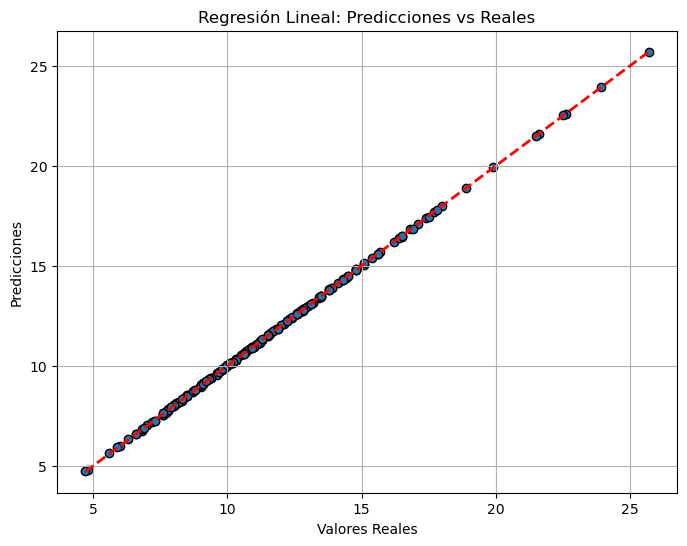

In [65]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 2. Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizaci√≥n (si no tienes X_norm)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# 4. Entrenar el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 5. Predicciones
y_pred = lin_reg.predict(X_test)

# 6. Evaluaci√≥n del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadr√°tico Medio): {mse:.2f}")
print(f"RMSE (Ra√≠z del Error Cuadr√°tico Medio): {rmse:.2f}")
print(f"R¬≤   (Coeficiente de determinaci√≥n): {r2:.2f}")

# 7. Visualizaci√≥n
# 7. Visualizaci√≥n de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresi√≥n Lineal: Predicciones vs Reales')
plt.grid(True)
plt.show()

In [66]:
# An√°lisis de la gr√°fica: Regresi√≥n Lineal - Predicciones vs Reales

# La gr√°fica muestra una comparaci√≥n entre los valores reales y las predicciones generadas por un modelo de regresi√≥n lineal. En el gr√°fico:

# Los puntos azules representan las predicciones del modelo frente a los valores reales.

# La l√≠nea roja discontinua representa la l√≠nea de referencia ùë¶=ùë•, que indica una predicci√≥n perfecta (es decir, donde el valor predicho es exactamente
# igual al valor real).

# El valor del coeficiente de determinaci√≥n ùëÖ2=1.00 indica un ajuste perfecto del modelo.

# Interpretaci√≥n:

# Todos los puntos se encuentran alineados muy cerca o exactamente sobre la l√≠nea roja, lo que sugiere que el modelo predice con una alt√≠sima precisi√≥n.

# Un R2 igual a 1 significa que el modelo explica el 100% de la variabilidad de los datos. Esto es muy poco com√∫n en problemas reales, por lo que puede 
# indicar que el modelo est√° sobreajustado o que se est√° evaluando sobre los mismos datos usados para entrenar.

# Conclusi√≥n:

# El modelo de regresi√≥n lineal logr√≥ una predicci√≥n casi exacta de los valores reales, demostrando un desempe√±o excepcional en los datos evaluados. 
# Es importante verificar si este rendimiento se mantiene con datos nuevos (validaci√≥n cruzada o conjunto de prueba), para asegurar que no haya 
#sobreajuste.

In [67]:
### 2.5 Equivalent Code using statsmodels


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.233e+06
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:43:59   Log-Likelihood:                 1820.1
No. Observations:                 853   AIC:                            -3634.
Df Residuals:                     850   BIC:                            -3620.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4401      0.004   2567.174      0.0

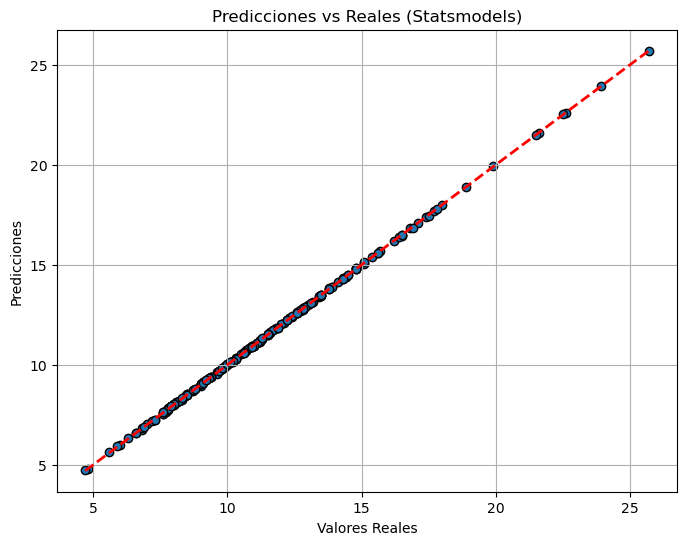

In [68]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supongamos que ya tienes X y y definidos como DataFrames o arrays
# X: variables independientes, y: variable dependiente

# 1. Divisi√≥n de datos (manual o con numpy)
from sklearn.model_selection import train_test_split  # solo esta parte de sklearn para dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Normalizaci√≥n manual (opcional, si hay variables en diferente escala)
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std  # usar media y std del train

# 3. Agregar constante (intercepto)
X_train_sm = sm.add_constant(X_train_norm)
X_test_sm = sm.add_constant(X_test_norm)

# 4. Entrenar modelo con OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# 5. Imprimir resumen estad√≠stico
print(results.summary())

# 6. Predicciones
y_pred = results.predict(X_test_sm)

# 7. M√©tricas de evaluaci√≥n
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)

print("\nEvaluaci√≥n del modelo:")
print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadr√°tico Medio): {mse:.2f}")
print(f"RMSE (Ra√≠z del Error Cuadr√°tico Medio): {rmse:.2f}")
print(f"R¬≤   (Coeficiente de determinaci√≥n): {r2:.2f}")

# 8. Visualizaci√≥n: valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Reales (Statsmodels)')
plt.grid(True)
plt.show()


In [69]:
# El gr√°fico muestra una l√≠nea diagonal casi perfecta entre las predicciones y los valores reales:

# Los puntos est√°n alineados sobre la l√≠nea roja (l√≠nea de igualdad), lo que confirma que el modelo predice los valores de forma muy precisa.

# No hay dispersi√≥n evidente ni patrones de error sistem√°tico.

# Conclusi√≥n
# El modelo de regresi√≥n lineal simple entre FUELCONSUMPTION_COMB y CO2EMISSIONS tiene un desempe√±o sobresaliente. El coeficiente indica una relaci√≥n 
# fuerte y positiva, y el valor de R¬≤ confirma que el modelo explica casi toda la variabilidad en las emisiones. Esto sugiere que el consumo de 
# combustible combinado es un excelente predictor de las emisiones de CO2 en este conjunto de datos.


#### TAREA: realizar estos mismos ejecicion para bases de datos propias o de la web, existen muchos repositorios para tal fin